In [1]:
import numpy as np
import pandas as pd

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [3]:
df = (full_dataset).copy()

In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60198 entries, 0 to 60197
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          60198 non-null  object 
 1   title                  60198 non-null  object 
 2   original_title         60198 non-null  object 
 3   year                   60198 non-null  int64  
 4   date_published         60198 non-null  object 
 5   genre                  60198 non-null  object 
 6   duration               60198 non-null  int64  
 7   country                60193 non-null  object 
 8   language               59759 non-null  object 
 9   director               60174 non-null  object 
 10  writer                 59390 non-null  object 
 11  production_company     57454 non-null  object 
 12  actors                 60168 non-null  object 
 13  description            58205 non-null  object 
 14  avg_vote               60198 non-null  float64
 15  vo

### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

In [5]:
# Target variable
y = df['reviews_from_critics']
y.values

array([7., 2., 3., ..., 6., 4., 6.])

In [6]:
full_dataset.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,60198.000000,60198.000000,60198.000000,6.019800e+04,8812.000000,56129.000000,51969.000000
mean,1985.308366,99.744825,5.997349,1.049150e+04,55.532229,44.926901,27.269872
std,23.308107,22.753228,1.199483,5.686771e+04,17.885123,152.973352,55.689940
min,1906.000000,40.000000,1.000000,1.000000e+02,1.000000,1.000000,1.000000
25%,1970.000000,88.000000,5.400000,2.060000e+02,43.000000,4.000000,3.000000
50%,1992.000000,95.000000,6.200000,5.030000e+02,56.000000,10.000000,8.000000
75%,2005.000000,107.000000,6.800000,2.000000e+03,68.000000,28.000000,24.000000
max,2019.000000,729.000000,10.000000,2.159628e+06,100.000000,7029.000000,837.000000


### Ans:- Target variable = y is given above describe that real value of movie by critics which is really important for success of movie by their reviews_from_critics.

1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

### Ans:- KNeighborsClassifier Model, DecisionTreeClassifier and  LogisticRegression Model are going to used for this task because it is will give accurate result and simple criertia for tunning hyperparameter.

In [7]:
# Ans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

In [8]:
# Ans
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def convert_to_string(w):
    w = w.str.split(" ")
    return w

### Part 2.

Explore and preprocess the data

2.1 Split data into train and test

In [9]:
df['imdb_title_id_no'] = df['imdb_title_id'].str.split("tt").str.get(1)

In [10]:
from sklearn.model_selection import train_test_split

df.fillna(0,inplace=True)
df.isnull().sum()
X = df[['year','duration','avg_vote','votes','metascore','reviews_from_users', 'imdb_title_id_no']]
y = df['reviews_from_critics']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

cat_columns = X_train.columns[X_train.dtypes == "object"].tolist()
num_columns = X_train.columns[(X_train.dtypes == "int64") | (X_train.dtypes == "float64")].tolist()

num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(),
    OneHotEncoder()
)

column_transformer = ColumnTransformer([
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
], remainder='drop')

2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


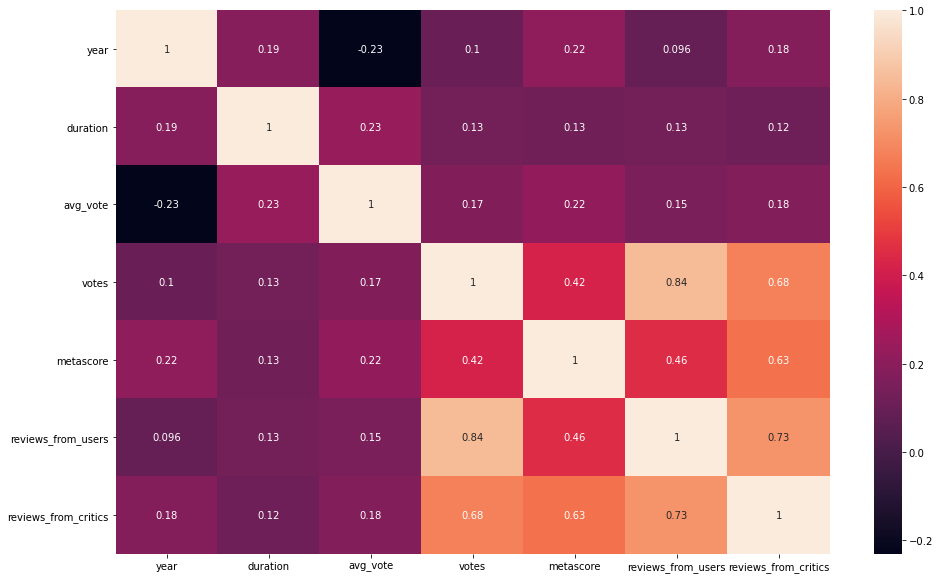

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

X = df[['year','duration','avg_vote','votes','metascore','reviews_from_users']]
X_col = X.columns


plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


### A Scatter Plot is a data visualization that displays the values of two different variables as points. The data for each point is represented by its horizontal (x) and vertical (y) position on the visualization.

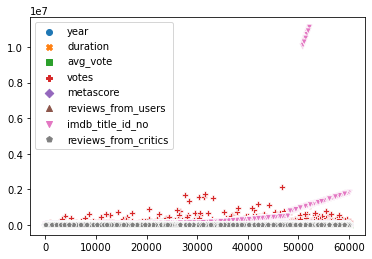

In [13]:
sns.scatterplot(
    data=X_test.join(y_test, how='inner')
)

Matplotlib is a library in Python and it is numerical – mathematical extension for NumPy library. Pyplot is a state-based interface to a Matplotlib module which provides a MATLAB-like interface. There are various plots which can be used in Pyplot are Line Plot, Contour, Histogram, Scatter, 3D Plot, etc.

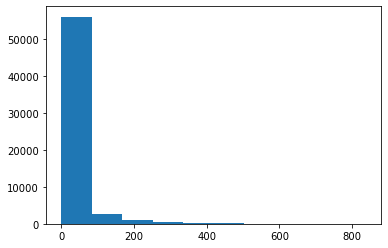

In [14]:
plt.hist(y);

In [15]:
s = ['title', 'genre', 'country', 'language', 'director', 'actors', 'description']
for i in s:
    convert_to_string(df[i])
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,imdb_title_id_no
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,0,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,0,0,0.0,7.0,7.0,0000574
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",0,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.9,171,0,0,0,0.0,4.0,2.0,0001892
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,0,0,0.0,24.0,3.0,0002101
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2019,0,0,0,0.0,28.0,14.0,0002130
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"An account of the life of Jesus Christ, based ...",5.7,438,0,0,0,0.0,12.0,5.0,0002199


### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

## 1. DecisionTreeClassifier Model

In [16]:
# initiate the pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
model = pipeline = Pipeline([
        ('column_transformer', column_transformer),
        ('tree', DecisionTreeClassifier())
    ])

# model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

model = pipeline = Pipeline([
        ('column_transformer', column_transformer),
        ('tree', DecisionTreeClassifier())
    ])


## 2. LogisticRegression Model

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = classifier.predict(X_test)

## 3. KNeighborsClassifier Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

3.2 Use cross-validation to compare models and select best set of hyperparameters

In [20]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# tunning of hyperparameters
clf = tree.DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(estimator=clf, X=X, y=y)
scores.mean()

0.1491575124477784

### 2. LogisticRegression Score

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2730    0    0 ...    0    0    0]
 [1956    1    0 ...    0    0    0]
 [1553    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 2)
scores.mean()

0.1368888227710007

### 3. KNeighborsClassifier Score

In [23]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.15273240928428716

3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

## - KNeighborsClassifier('K-Nearest Neighbor classification') Model is best for model method
## - It give more accuracy and result compare to other model

In [24]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X, 2, mode='connectivity', include_self=True)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

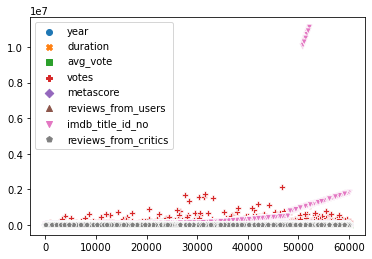

In [25]:
sns.scatterplot(
    data=X_test.join(y_test, how='outer')
)